In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

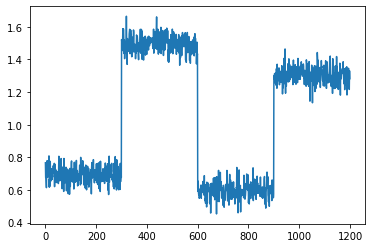

In [2]:
# Generate test data
test_signal = np.concatenate(
    [np.random.normal(0.7, 0.05, 300), 
     np.random.normal(1.5, 0.05, 300),
     np.random.normal(0.6, 0.05, 300),
     np.random.normal(1.3, 0.05, 300)])
plt.plot(test_signal)

In [3]:
import sranodec as anom

In [4]:
# less than period
amp_window_size=24
# (maybe) as same as period
series_window_size=24
# a number enough larger than period
score_window_size=100

In [5]:
spec = anom.Silency(amp_window_size, series_window_size, score_window_size)

/Users/JP22564/Works/Package/spectral-residual/sranodec/util.py:31: RuntimeWarning: invalid value encountered in double_scalars
  slope = [(last_value - v) / i for (i, v) in enumerate(values[::-1])]


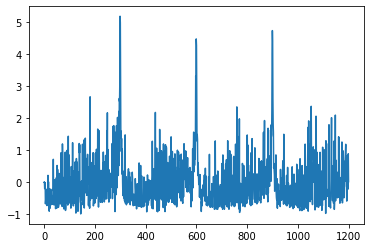

In [6]:
score = spec.generate_anomaly_score(test_signal)
plt.plot(score)

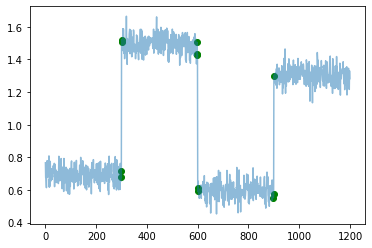

In [7]:
# Plot data with estimated anomalous points
plt.plot(test_signal, alpha=0.5, label="observation")
index_changes = np.where(score > np.percentile(score, 99))[0]
plt.scatter(index_changes, test_signal[index_changes], c='green', label="change point")